In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import surp
import matplotlib.pyplot as plt
import vice
import numpy as np
from surp.gce_math import Z_to_MH, MH_to_Z, Z_SUN
from surp.yields import calc_y
import arya

from surp.agb_interpolator import interpolator


/users/PAS2232/aeyobd/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [3]:
y_cc = vice.yields.ccsne.settings
y_agb = vice.yields.agb.settings


In [4]:
def plot_y_z(Zs=Z_SUN * np.logspace(-1, 0.5, 100), ele="c", yields="all", kind="line", factor = 1, **kwargs):        
    y_c_agb = calc_y(Zs, ele=ele, kind=yields)
    plt.xlabel(r"$\log Z / Z_\odot$")
    plt.ylabel(r"yield")
    if kind == "line":
        p = plt.plot(Z_to_MH(Zs), y_c_agb, **kwargs)
    elif kind == "scatter":
        p = plt.scatter(Z_to_MH(Zs), y_c_agb, **kwargs)
    return p


# CCSNe Model

In [8]:
from surp.yield_models import Lin_CC, LogLin_CC, BiLin_CC, BiLogLin_CC, C_AGB_Model, ZeroAGB, Quadratic_CC, Piecewise_CC

In [9]:
BiLin_CC(zeta=0.1, y0=2)(2)

2.1984

In [13]:
LogLin_CC(zeta=make_yields.ZETA_C_0, y0=make_yields.Y_C_0)(1)

0.004103045663283088

In [14]:
vice.yields.agb.settings["c"] = ZeroAGB()

In [15]:
y0 = make_yields.Y_C_0

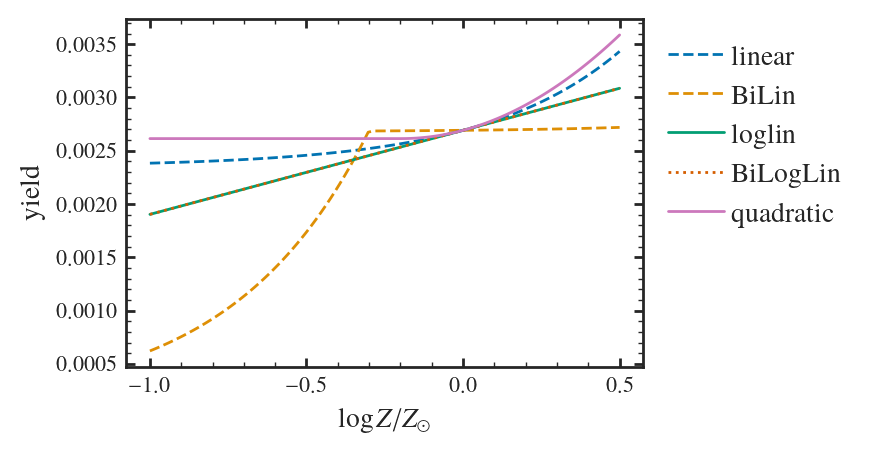

In [25]:
y_cc["c"] = Lin_CC(zeta=make_yields.ZETA_C_0, y0=y0 )
plot_y_z(label="linear", ls="--")

y_cc["c"] = BiLin_CC(zeta=make_yields.ZETA_C_0, y0=y0, Z1=0.008, y1=0.0001)
plot_y_z(label="BiLin", ls="--")


y_cc["c"] = LogLin_CC(zeta=make_yields.ZETA_C_0, y0=make_yields.Y_C_0)
plot_y_z(label="loglin")

y_cc["c"] = BiLogLin_CC(zeta=make_yields.ZETA_C_0, y0=make_yields.Y_C_0, y1=0.001)
plot_y_z(label="BiLogLin",  ls=":")


y_cc["c"] = Quadratic_CC(A=make_yields.A_C_0, zeta=make_yields.ZETA_C_0,  y0=make_yields.Y_C_0)
plot_y_z(label="quadratic")


arya.Legend(-1)

In [ ]:
y0s = [4e-4, 2e-4, 2.5e-4]
Zs = [1e-4, 0.008]
zetas = [0, 1e-4, 2.5e-4]
y_cc["c"] = Piecewise_CC(y0s, zetas, Zs)

MH = np.linspace(-5, 0.5, 1000)
Z = MH_to_Z(MH)
plot_y_z(Zs=Z, label="quadratic")




In [22]:
y_cc["c"] = LogLin_CC(B=0.001)

plot_y_z()

y_cc["c"] = LogLin_CC(y0 = 0.005, B=0.001)
plot_y_z()

y_cc["c"] = lambda Z: LogLin_CC(y0 = 0.005, B=0.001)(Z) - LogLin_CC(y0 = 0.004, B=0.001)(Z)
plot_y_z(label="difference")
arya.Legend(loc=-1)

TypeError: __cinit__() got an unexpected keyword argument 'B'

In [18]:
y_cc["c"] = LogLin_CC(y0=0, B=0.01)

plot_y_z()

y_cc["c"] = LogLin_CC(y0=0, B = 0.02)
plot_y_z()

arya.Legend(loc=-1)

TypeError: __cinit__() got an unexpected keyword argument 'B'

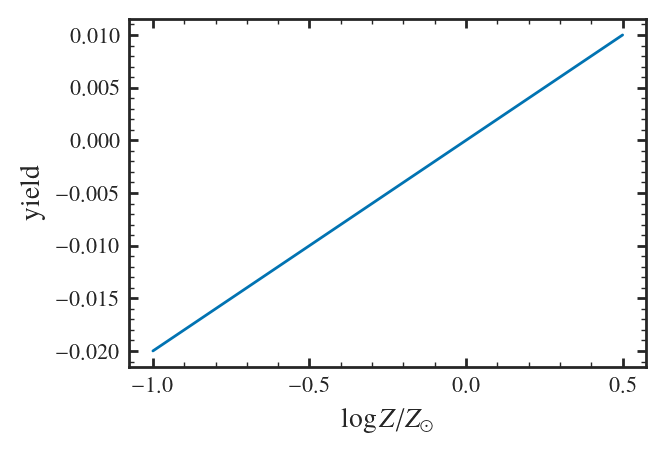

In [16]:
plot_y_z()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 0.003)

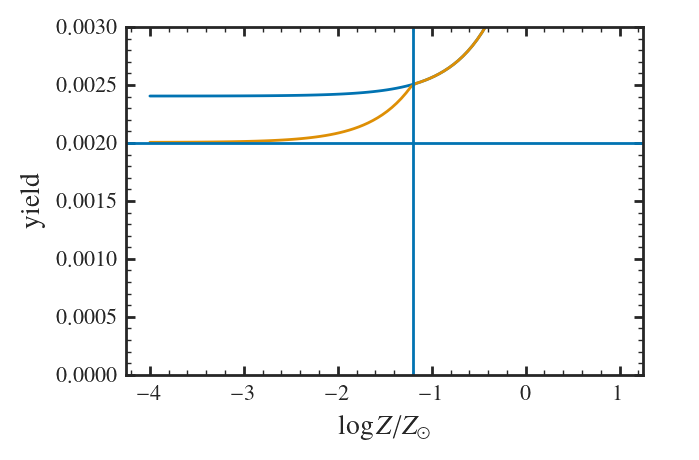

In [17]:
y_cc["c"] = Lin_CC()
Zs = MH_to_Z(np.linspace(-4, 1, 100))
plot_y_z(Zs)

y_cc["c"] = BiLin_CC(Z1=0.001, y1=2e-3)

plot_y_z(Zs,)
arya.Legend(loc=-1)
plt.axhline(2e-3)
plt.axvline(Z_to_MH(1e-3))
plt.ylim(0, 3e-3)

# AGB Interpolator

In [5]:
y_cc["c"] = 0
y_agb = vice.yields.agb.settings

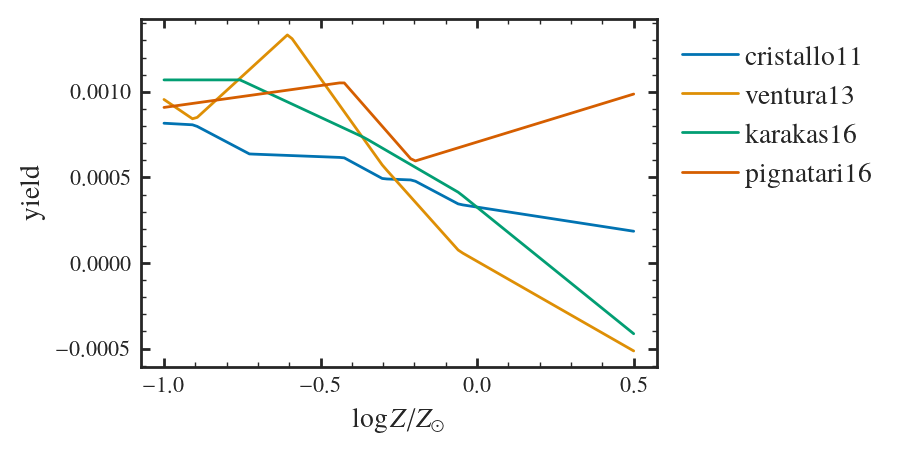

In [6]:
for study in surp.AGB_MODELS:
    
    y_agb["c"] = interpolator("c", study=study, interp_kind="log", low_z_flat=True)
    plot_y_z( label=study)

arya.Legend(loc=-1)

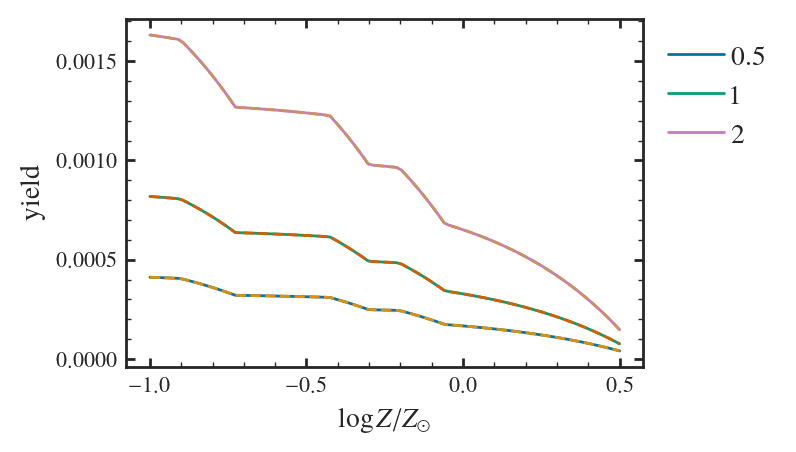

In [7]:
for alpha in [0.5, 1, 2]:
    y_agb["c"] = interpolator("c", prefactor=alpha)
    plot_y_z( label=alpha)
    y_agb["c"] = interpolator("c")
    y_agb["c"] = y_agb["c"]*alpha
    plot_y_z(ls="--")

arya.Legend(loc=-1)

Text(0, 0.5, 'Y')

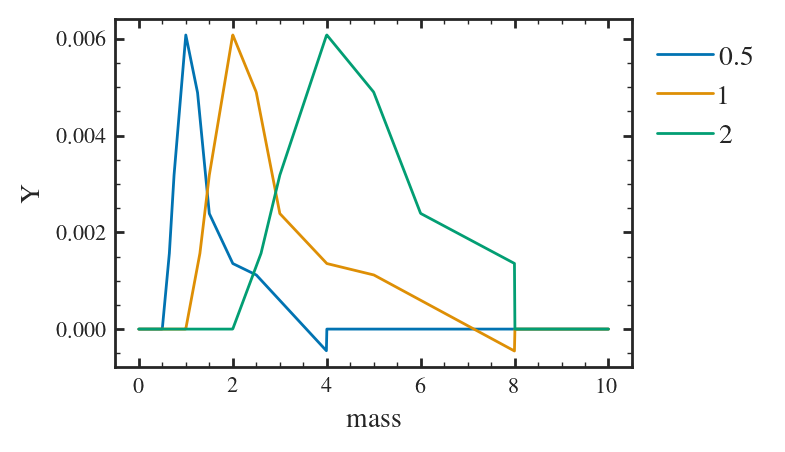

In [19]:
ms = np.linspace(0, 10, 1000)
Z = 0.1*Z_SUN
for alpha in [0.5, 1, 2]:
    y_agb["c"] = interpolator("c", mass_factor=alpha, pinch_mass=1)
    plt.plot(ms, [y_agb["c"](m, Z) for m in ms], label=alpha)

arya.Legend(loc=-1)
plt.xlabel("mass")
plt.ylabel("Y")

Text(0, 0.5, 'Y')

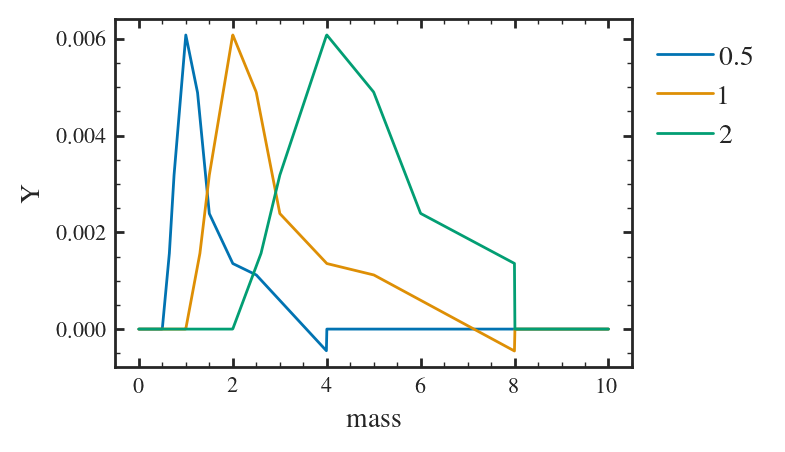

In [20]:
for alpha in [0.5, 1, 2]:
    y_agb["c"] = interpolator("c", mass_factor=alpha, no_negative=True)
    plt.plot(ms, [y_agb["c"](m, Z) for m in ms], label=alpha)

arya.Legend(loc=-1)
plt.xlabel("mass")
plt.ylabel("Y")

In [25]:
interpolator("c")(7.999999999999999, 0.014)

-0.0008008

In [32]:
8 * 1.3

10.4

In [33]:
print(_ / 1.3)

8.0


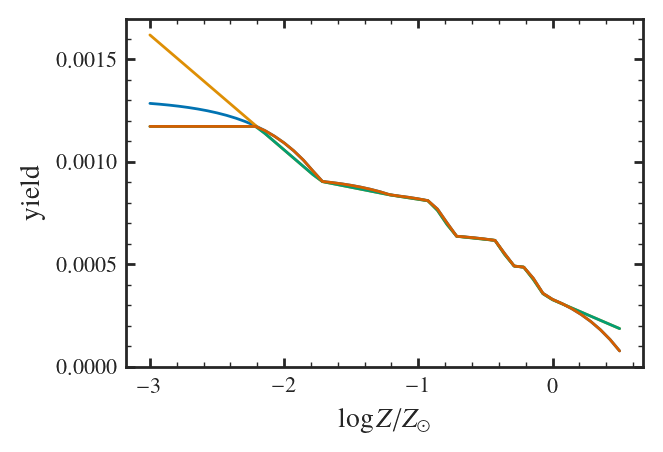

In [21]:
Zs = 0.016*10**np.linspace(-3, 0.5)
y_agb["c"] = interpolator("c")
plot_y_z(Zs)

y_agb["c"] = interpolator("c", interp_kind="log")
plot_y_z(Zs)

y_agb["c"] = interpolator("c", interp_kind="log", low_z_flat=True)
plot_y_z(Zs)


y_agb["c"] = interpolator("c", low_z_flat=True)
plot_y_z(Zs)